In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/global_air_quality_data_10000.csv')

In [21]:

df.shape

(1900, 12)

In [22]:
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [5]:
india_df = df[df['Country'] == 'India'].sort_values(by='Date', ascending=False)

india_df.head()


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
578,Mumbai,India,2023-12-28,141.04,101.91,16.80,12.00,5.40,196.22,0.84,20.08,11.33
755,Mumbai,India,2023-12-26,21.62,34.16,77.69,21.54,2.37,77.73,-7.71,58.44,7.87
551,Mumbai,India,2023-12-26,26.90,38.99,23.99,11.31,8.27,123.27,-4.84,25.67,15.21
823,Mumbai,India,2023-12-21,132.91,106.89,96.33,47.99,2.01,32.71,-9.58,15.82,14.18
1036,Mumbai,India,2023-12-20,7.55,139.57,10.66,40.00,3.68,95.98,37.88,62.41,19.82


In [6]:
india_df.tail()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
840,Mumbai,India,2023-01-14,45.37,53.48,40.95,29.24,5.20,94.79,31.23,54.25,1.52
795,Mumbai,India,2023-01-10,148.46,149.98,16.30,8.30,2.18,187.58,16.22,84.57,3.23
853,Mumbai,India,2023-01-10,60.21,114.56,29.96,10.91,4.77,176.07,24.28,92.27,4.28
1444,Mumbai,India,2023-01-09,101.58,78.03,30.44,4.11,1.11,192.05,-5.12,52.85,4.16
720,Mumbai,India,2023-01-04,92.84,155.11,8.99,11.29,2.22,71.12,6.97,95.96,3.47


In [7]:
df_india = df[df['Country'] == 'India'].copy()

In [8]:
df_india = df_india.sort_values(by='Date', ascending=False)

In [9]:
df_india.reset_index(drop=True, inplace=True)

In [10]:
df_india.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Mumbai,India,2023-12-28,141.04,101.91,16.80,12.00,5.40,196.22,0.84,20.08,11.33
1,Mumbai,India,2023-12-26,21.62,34.16,77.69,21.54,2.37,77.73,-7.71,58.44,7.87
2,Mumbai,India,2023-12-26,26.90,38.99,23.99,11.31,8.27,123.27,-4.84,25.67,15.21
3,Mumbai,India,2023-12-21,132.91,106.89,96.33,47.99,2.01,32.71,-9.58,15.82,14.18
4,Mumbai,India,2023-12-20,7.55,139.57,10.66,40.00,3.68,95.98,37.88,62.41,19.82


In [11]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         100 non-null    object 
 1   Country      100 non-null    object 
 2   Date         100 non-null    object 
 3   PM2.5        100 non-null    float64
 4   PM10         100 non-null    float64
 5   NO2          100 non-null    float64
 6   SO2          100 non-null    float64
 7   CO           100 non-null    float64
 8   O3           100 non-null    float64
 9   Temperature  100 non-null    float64
 10  Humidity     100 non-null    float64
 11  Wind Speed   100 non-null    float64
dtypes: float64(9), object(3)
memory usage: 9.5+ KB


In [12]:
df_india.shape

(100, 12)

In [13]:
df_india.to_csv('/content/drive/MyDrive/global_air_quality_data_10000.csv', index=False)


In [14]:
df['Country'].unique()


array(['Thailand', 'Turkey', 'Brazil', 'India', 'France', 'USA', 'Japan',
       'UK', 'South Korea', 'Egypt', 'Mexico', 'Germany', 'China',
       'Australia', 'UAE', 'Canada', 'Spain', 'South Africa', 'Russia'],
      dtype=object)

In [15]:
df_100_per_country = df.groupby('Country').head(100)

# Save to new CSV (optional)
df_100_per_country.to_csv('country_100_rows.csv', index=False)

# Show the result
print(df_100_per_country['Country'].value_counts())

Country
Thailand        100
Turkey          100
Brazil          100
India           100
France          100
USA             100
Japan           100
UK              100
South Korea     100
Egypt           100
Mexico          100
Germany         100
China           100
Australia       100
UAE             100
Canada          100
Spain           100
South Africa    100
Russia          100
Name: count, dtype: int64


In [16]:
df_100_per_country.to_csv('/content/drive/MyDrive/global_air_quality_data_10000.csv', index=False)
from google.colab import files
files.download('/content/drive/MyDrive/global_air_quality_data_10000.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
df_100_per_country.shape

(1900, 12)

In [18]:
df_100_per_country.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


<Axes: ylabel='City'>

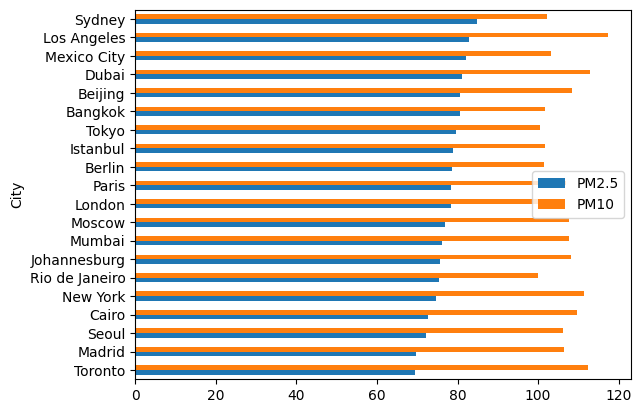

In [ ]:
df_100_per_country.groupby('City')[['PM2.5', 'PM10']].mean().sort_values(by='PM2.5').plot(kind='barh')


<Axes: xlabel='Temperature', ylabel='PM2.5'>

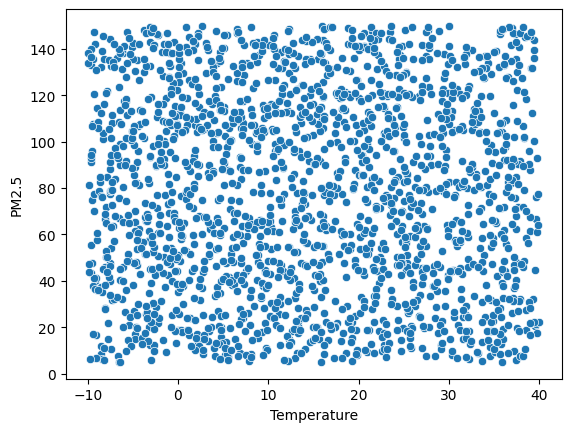

In [ ]:
sns.scatterplot(data=df_100_per_country, x='Temperature', y='PM2.5')


<Axes: xlabel='Humidity', ylabel='PM2.5'>

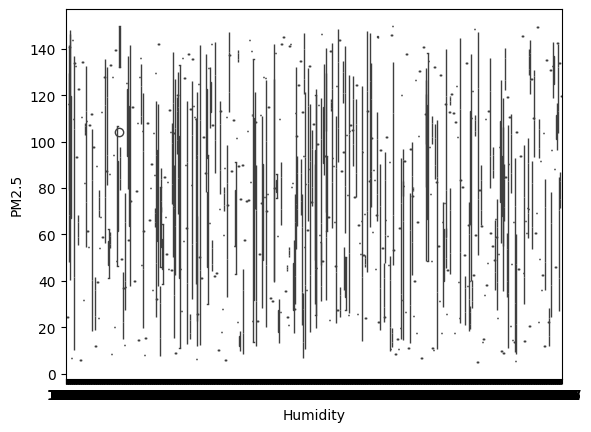

In [ ]:
sns.boxplot(data=df_100_per_country, x='Humidity', y='PM2.5')
